## Machine Hack CV Hackathon                                 
VG Sravan

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Importing Dependencies
fastai imports all required dependencies listed here https://github.com/fastai/fastai/blob/master/fastai/imports/core.py
and https://github.com/fastai/fastai/blob/master/fastai/imports/torch.py(torch dependencies).

In [2]:
import fastai
from fastai.vision import *


In [3]:
fastai.__version__

'1.0.61'

In [4]:
import torch
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [5]:
torch.cuda.memory_allocated()

0

In [6]:
# ??ImageList

In [7]:
bs = 128
# bs = 64   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Data

All the path variables are set according to Kaggle's IDE

In [8]:
path = Path('../input/Data/')

In [9]:
path_trn = Path('../input/Data/Train')
path_test = Path('../input/Data/Test')

In [10]:
path_test.ls()

[PosixPath('../input/Data/Test/1675.jpg'),
 PosixPath('../input/Data/Test/19450.jpg'),
 PosixPath('../input/Data/Test/2409.jpg'),
 PosixPath('../input/Data/Test/15581.jpg'),
 PosixPath('../input/Data/Test/15074.jpg'),
 PosixPath('../input/Data/Test/13685.jpg'),
 PosixPath('../input/Data/Test/13713.jpg'),
 PosixPath('../input/Data/Test/7835.jpg'),
 PosixPath('../input/Data/Test/12841.jpg'),
 PosixPath('../input/Data/Test/11345.jpg'),
 PosixPath('../input/Data/Test/17257.jpg'),
 PosixPath('../input/Data/Test/14231.jpg'),
 PosixPath('../input/Data/Test/19465.jpg'),
 PosixPath('../input/Data/Test/5703.jpg'),
 PosixPath('../input/Data/Test/15494.jpg'),
 PosixPath('../input/Data/Test/16028.jpg'),
 PosixPath('../input/Data/Test/10883.jpg'),
 PosixPath('../input/Data/Test/4697.jpg'),
 PosixPath('../input/Data/Test/5684.jpg'),
 PosixPath('../input/Data/Test/9522.jpg'),
 PosixPath('../input/Data/Test/8397.jpg'),
 PosixPath('../input/Data/Test/11615.jpg'),
 PosixPath('../input/Data/Test/15900.jpg

#### Using RegEx to get category of image from its file name for labelling

In [11]:
fnames = get_image_files(f'{path_trn}/Dogs')
fnames[:5]

[PosixPath('../input/Data/Train/Dogs/9786.jpg'),
 PosixPath('../input/Data/Train/Dogs/8021.jpg'),
 PosixPath('../input/Data/Train/Dogs/10048.jpg'),
 PosixPath('../input/Data/Train/Dogs/18487.jpg'),
 PosixPath('../input/Data/Train/Dogs/12829.jpg')]

In [12]:
# Data Augmentation
tfms = get_transforms()
# to know more about get_transforms https://docs.fast.ai/vision.transform.html

In [13]:
data = (ImageList.from_folder(path, exclude = 'Test')
        .split_by_rand_pct(valid_pct=0.2)
        .label_from_folder()
        .add_test_folder('Test') 
        .transform(tfms,size =256)
        .databunch(bs = bs)
        .normalize(imagenet_stats))

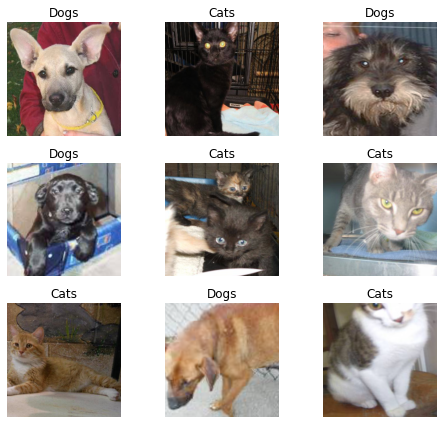

In [14]:
data.show_batch(rows=3, figsize=(7,6))

In [15]:
print(data.classes)
len(data.classes),data.c

['Cats', 'Dogs']


(2, 2)

## Training: resnet50

I have used resnet50 with ImageNet weights as initial weights and at first only last two layers are set as trainable.<br>

In [16]:
from fastai.callbacks import*

In [17]:
metrics = [error_rate, accuracy]

In [18]:
learn = cnn_learner(data, models.resnet50, metrics=metrics,callback_fns=[ActivationStats],path = ".", model_dir="")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [19]:
learn.model
# ResNet50 Architecture

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [20]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 128, 128]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 128, 128]       128        True      
______________________________________________________________________
ReLU                 [64, 128, 128]       0          False     
______________________________________________________________________
MaxPool2d            [64, 64, 64]         0          False     
______________________________________________________________________
Conv2d               [64, 64, 64]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
Conv2d               [64, 64, 64]         36,864     False     
___________________________________________________

Total nearly 23M trainable parameters

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


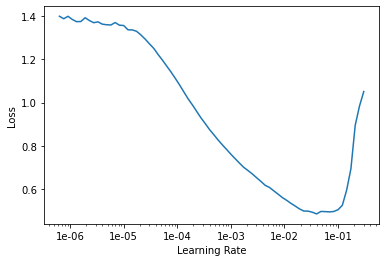

In [21]:
learn.lr_find()
learn.recorder.plot()

From this graph I took 1e-3 as best learning rate

In [22]:
lr = 1e-3

In [23]:
learn.fit_one_cycle(8, slice(lr))

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

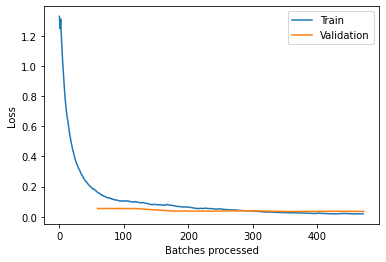

In [24]:
learn.recorder.plot_losses()

In [25]:
learn.save('stage1')

In [26]:
# preds,y = learn.get_preds(ds_type=DatasetType.Test)

In [27]:
# preds[:100]

## Interpretation and plotting top losses

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

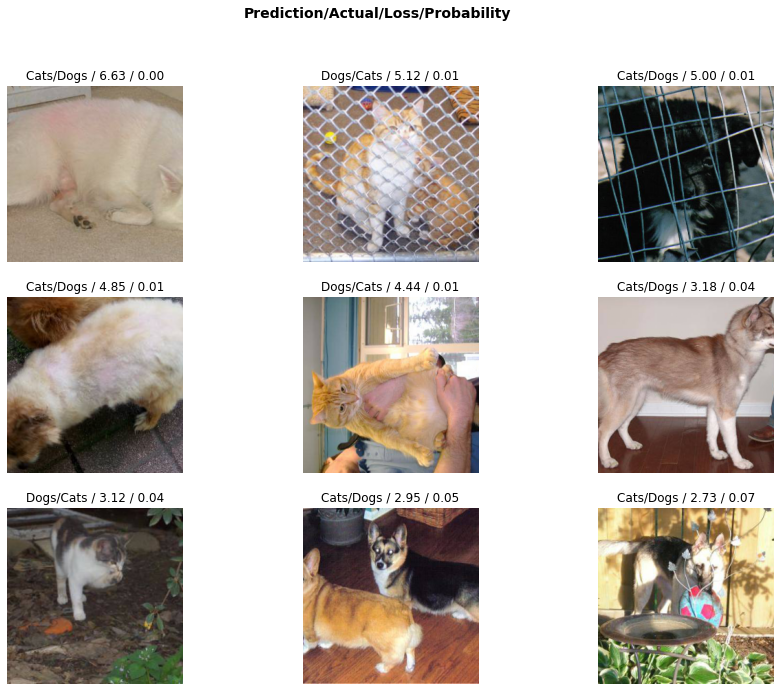

In [29]:
interp.plot_top_losses(9, figsize=(15,11))

In [30]:
# doc(interp.plot_top_losses)

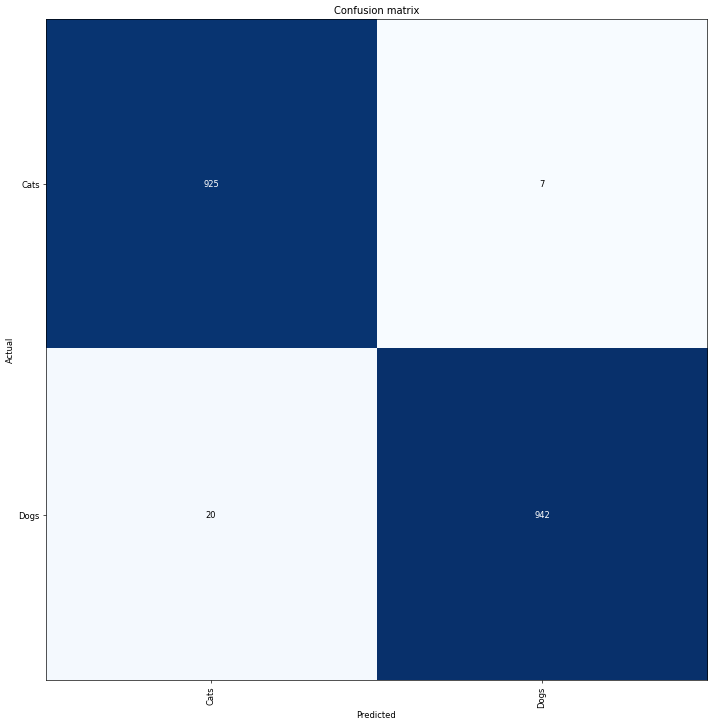

In [31]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [32]:
interp.most_confused(min_val=2)

[('Dogs', 'Cats', 20), ('Cats', 'Dogs', 7)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [33]:
learn.unfreeze()

In [34]:
learn.load('stage1');

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


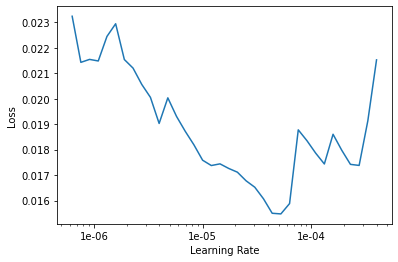

In [35]:
learn.lr_find()
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(6, max_lr=slice(1e-7,1e-6))

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

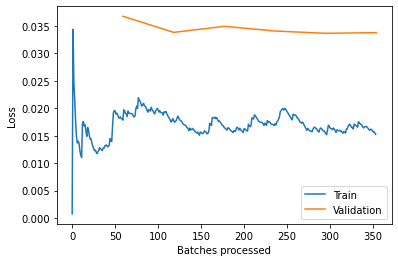

In [37]:
learn.recorder.plot_losses()

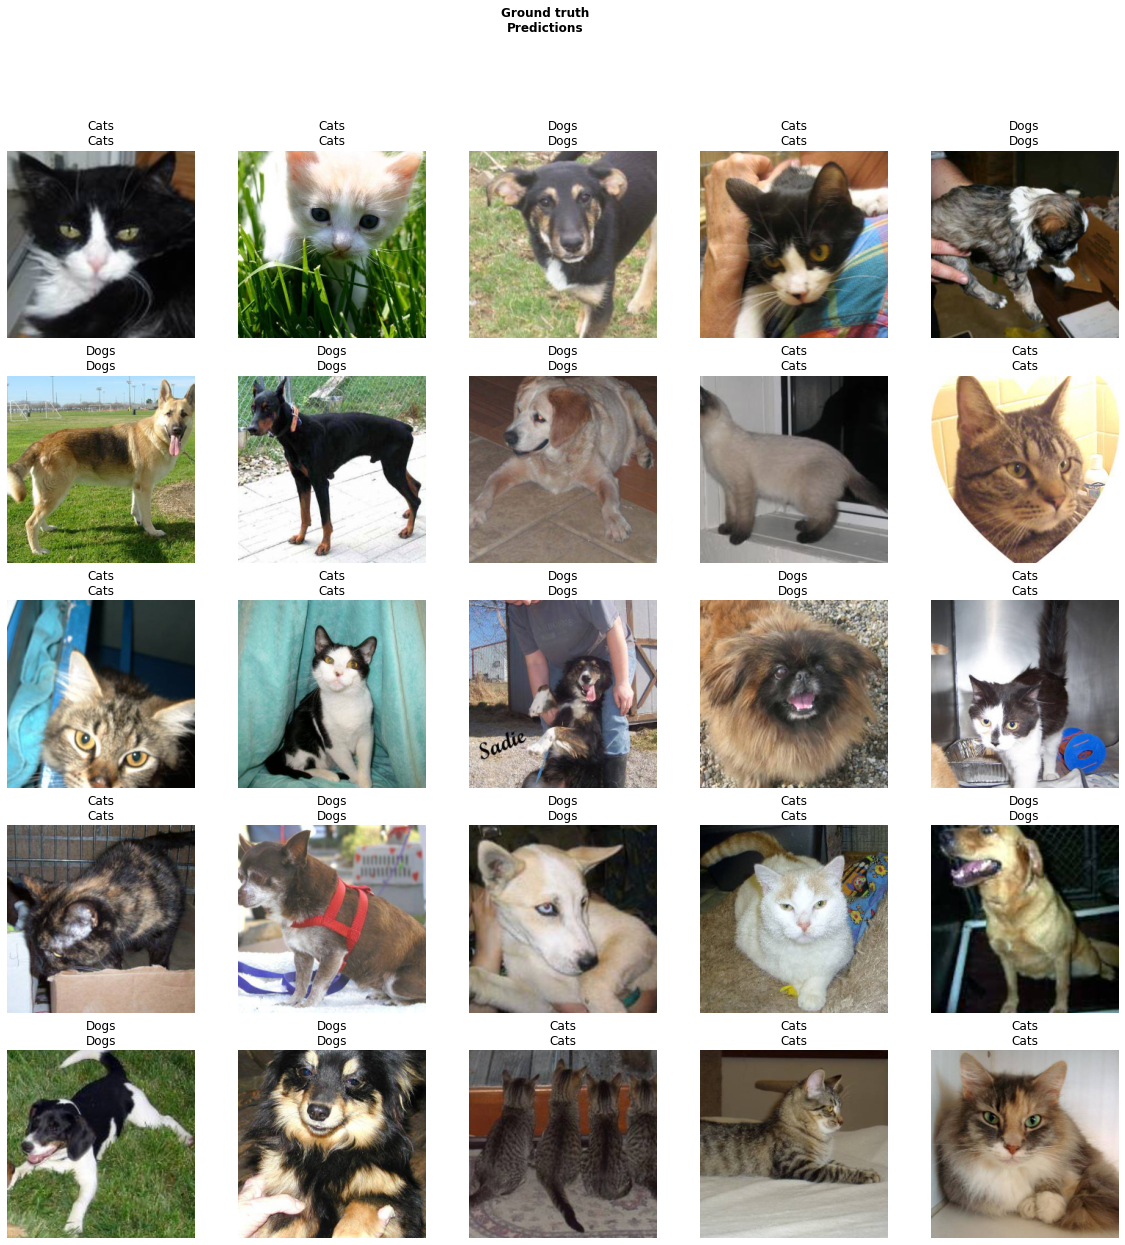

In [38]:
learn.show_results()

In [39]:
learn.save('Stage2')

That's a pretty accurate model!

## BUTTT
Thats not enough

Here lies the interesting part. Till now we trained the model with data of size(256, 256, 3) but now we will again train the model with the same dataset but increasing resolution of images to (512, 512, 3). For us it is basically the same data but for model it is completely different data and hence this is a way of data augmentation and it also improves robustness of model as now our model can deal with different resolution of images.

In [40]:
data = (ImageList.from_folder(path, exclude = 'Test')
        .split_by_rand_pct(valid_pct=0.2)
        .label_from_folder()
        .add_test_folder('Test') 
        .transform(tfms,size =512)
        .databunch(bs = 32)
        .normalize(imagenet_stats))

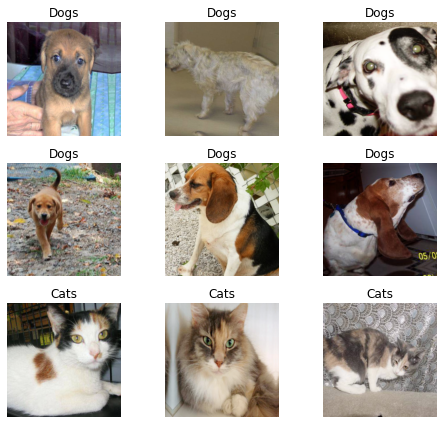

In [41]:
data.show_batch(rows=3, figsize=(7,6))

In [42]:
print(data.classes)
len(data.classes),data.c

['Cats', 'Dogs']


(2, 2)

In [43]:
metrics = [error_rate, accuracy]

In [44]:
learn = cnn_learner(data, models.resnet50, metrics=metrics,callback_fns=[ActivationStats],path = ".", model_dir="")

In [45]:
learn.load('Stage2')

Learner(data=ImageDataBunch;

Train: LabelList (7577 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
Cats,Cats,Cats,Cats,Cats
Path: ../input/Data;

Valid: LabelList (1894 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
Dogs,Dogs,Dogs,Dogs,Dogs
Path: ../input/Data;

Test: LabelList (4059 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: EmptyLabelList
,,,,
Path: ../input/Data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
    

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


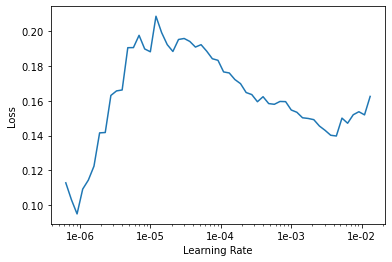

In [46]:
learn.lr_find()
learn.recorder.plot()

From this graph I took 1e-4 as best learning rate

In [47]:
lr = 1e-4

In [48]:
learn.fit_one_cycle(8, slice(lr))

In [49]:
learn.unfreeze()

In [50]:
learn.save('Stage1-Big')

In [51]:
learn.load('Stage1-Big');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


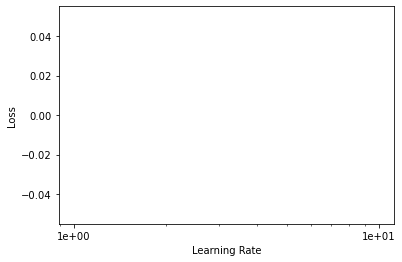

In [52]:
learn.lr_find()
learn.recorder.plot()

In [53]:
learn.fit_one_cycle(6, max_lr=slice(1e-7,1e-6))

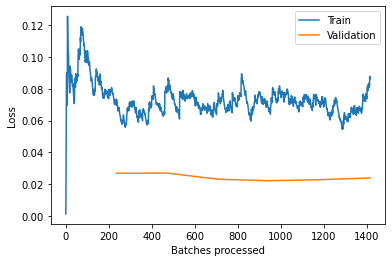

In [54]:
learn.recorder.plot_losses()

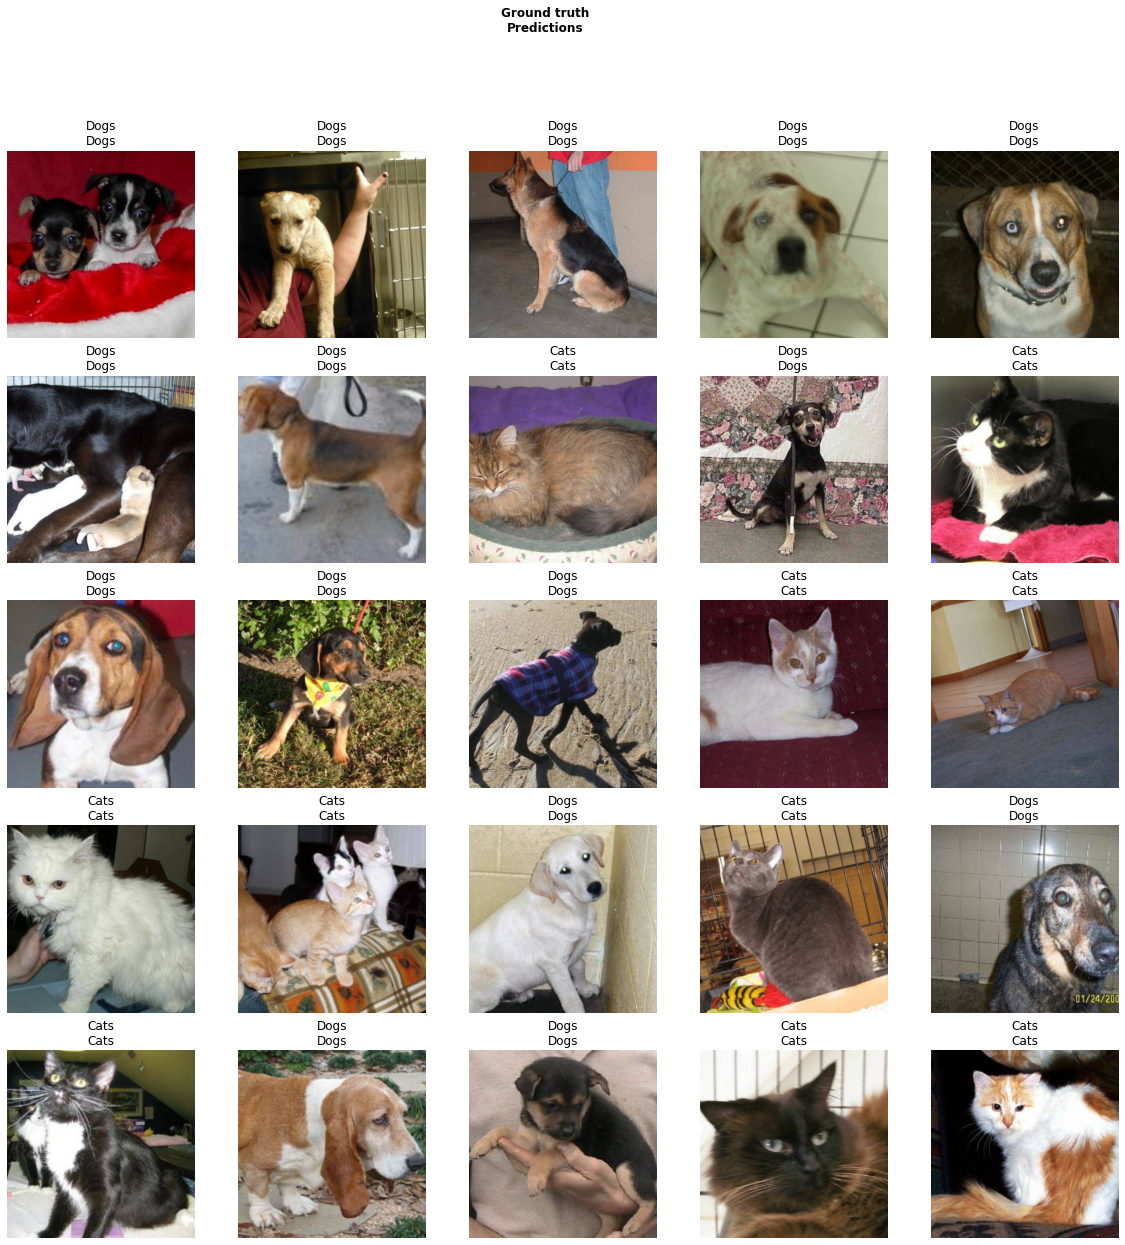

In [55]:
learn.show_results()

## Test Data

In [56]:
learn.save('Stage2-Big')

In [57]:
# imgg = data.test_ds[1][0]
# pp = learn.predict(imgg)
# # imgg
# pp[1]

In [58]:
test_files = get_image_files(path_test)

In [59]:
test_files[:5]
# print(len(test_files))

[PosixPath('../input/Data/Test/1675.jpg'),
 PosixPath('../input/Data/Test/19450.jpg'),
 PosixPath('../input/Data/Test/2409.jpg'),
 PosixPath('../input/Data/Test/15581.jpg'),
 PosixPath('../input/Data/Test/15074.jpg')]

In [60]:
get_y_fn = lambda x: f'{x.stem}.jpg'

In [61]:
ans = []
for i in range(len(test_files)):
    imgg = data.test_ds[i][0]
    pp = learn.predict(imgg)
    file = test_files[i]
    xx = get_y_fn(file)
    yy = pp[1].numpy()
    ans.append([xx, yy])
    

In [62]:
ans_pd = pd.DataFrame(ans, columns = ['File_Name', 'Category'])
ans_pd

File_Name Category
0      1675.jpg        1
1     19450.jpg        0
2      2409.jpg        1
3     15581.jpg        0
4     15074.jpg        1
...         ...      ...
4054   4712.jpg        0
4055  13350.jpg        1
4056   4774.jpg        0
4057  17816.jpg        0
4058   5326.jpg        0

[4059 rows x 2 columns]

In [63]:
path.ls()

[PosixPath('../input/Data/Test'),
 PosixPath('../input/Data/Train'),
 PosixPath('../input/Data/Sample_Submission.csv'),
 PosixPath('../input/Data/Train.csv')]

In [64]:
samp_sub = pd.read_csv(f'{path}/Sample_Submission.csv', names = ['File_Name', 'Remove'])

In [65]:
ans_pd_new = pd.merge(samp_sub, ans_pd, on='File_Name')

In [66]:
ans_pd_new.drop(columns = 'Remove', inplace = True)

In [67]:
ans_pd_new

File_Name Category
0      8121.jpg        0
1     15486.jpg        0
2      8132.jpg        0
3     16297.jpg        1
4     20838.jpg        1
...         ...      ...
4054  15376.jpg        0
4055  19489.jpg        1
4056   9762.jpg        0
4057   1423.jpg        0
4058  10488.jpg        0

[4059 rows x 2 columns]

In [68]:
ans_pd_new.to_excel('Final_2.xlsx', index=False)

## ----------------------------------------DONE--------------------------------------------------------------------------